# Chapter 8: Dimensionality Reduction

---

## Introduction
Chapter 8 of Hands-On Machine Learning introduces Dimensionality Reduction, a key technique for simplifying high-dimensional datasets while preserving essential information. It explains how reducing dimensions can improve model performance, visualization, and computational efficiency. The chapter covers popular methods like Principal Component Analysis (PCA) and manifold learning techniques.

---

## Curse of Dimensionality

### 🧠 Understanding High-Dimensional Space  
- Humans struggle to imagine high-dimensional spaces; even a 4D shape like a tesseract is hard to picture.  
- In high dimensions, points behave differently—for example, in a 10,000D cube, nearly all points are near the edges.  
- This challenges our intuition and shows how unusual high-dimensional geometry can be.


### ⚠️ Curse of Dimensionality  
- Distances between points grow rapidly with more dimensions, making data increasingly sparse.  
- This sparsity leads to unreliable predictions and a high risk of overfitting.  
- While increasing data might help, the amount needed grows exponentially—soon becoming practically impossible.  

---

## 8.1 Projection

In real-world datasets, data often lies close to a much lower-dimensional subspace due to constant or correlated features.
Simple projection (like onto a 2D plane) can reduce dimensionality effectively when the subspace is flat, as shown in a 3D-to-2D example.
However, for curved manifolds (e.g., the Swiss roll), projection fails—what’s needed is unfolding the data to preserve its true structure.

---

## 8.2 Manifold Learning

Manifold learning is especially useful when your data lies on a nonlinear subspace (manifold) of a high-dimensional space. It helps uncover the underlying structure by projecting data to a lower dimension while preserving important relationships.

In [2]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt

In [3]:
# Load dataset
wine = load_wine(as_frame=False)
X = wine.data
y = wine.target

In [4]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)

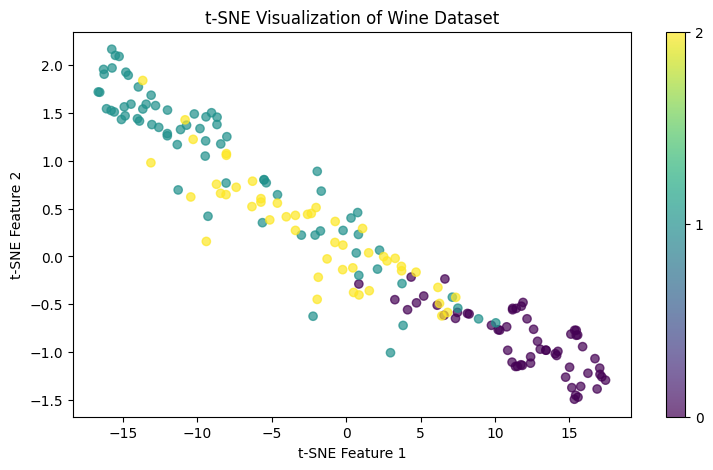

In [5]:
# Plot the result
plt.figure(figsize=(9, 5))
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, ticks=[0, 1, 2])
plt.title("t-SNE Visualization of Wine Dataset")
plt.xlabel("t-SNE Feature 1")
plt.ylabel("t-SNE Feature 2")
plt.show()

---

## 8.3 PCA (Principal Compnent Analysis)

Principal Component Analysis (PCA) is a dimensionality reduction technique that projects data onto a lower-dimensional subspace while preserving the maximum variance. It identifies orthogonal axes (principal components) using Singular Value Decomposition (SVD) after centering the data. This reduces overfitting risk and retains the most informative aspects of the dataset.

In [6]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=False)
X = iris.data
y = iris.target

In [7]:
# PCA assumes that data is centered around the mean
X_norm = X - X.mean()

In [8]:
U, s, Vt = np.linalg.svd(X)
pc0 = Vt[0]
pc1 = Vt[1]

In [9]:
# Projecting data
PC = Vt[:2].T
X2D = X @ PC

X2D[:5, :]

array([[-5.91274714,  2.30203322],
       [-5.57248242,  1.97182599],
       [-5.44697714,  2.09520636],
       [-5.43645948,  1.87038151],
       [-5.87564494,  2.32829018]])

In [10]:
# Using scikit-learn implementation
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)      # PCA has already a suitable handling of centering the data

X2D[:5, :]

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451]])

In [11]:
# Here we an also see the participating ratio of capturing the variance of every principal component
pca.explained_variance_ratio_

array([0.92461872, 0.05306648])

### Tunning the number of components

In [12]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

mnist = fetch_openml('mnist_784', as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.1, random_state=42)

In [13]:
pca = PCA()
pca.fit(X_train)

cumsum = np.cumsum(pca.explained_variance_ratio_)
n_comps = np.argmax(cumsum >= 0.95) + 1     # Keeping 95% of the variance

In [14]:
n_comps

np.int64(154)

In [15]:
# Or another shortcut we can use
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [16]:
pca.n_components_

np.int64(154)

In [17]:
# Or a the common tunning techniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline

RF = RandomForestClassifier(random_state=42)
pca = PCA()

params_dist = {
    'pca__n_components': np.arange(10, 80),
    'rf_clf__n_estimators': np.arange(50, 500)
}

model_pipe = Pipeline(
    [
        ('pca', pca),
        ('rf_clf', RF)
    ]
)

In [18]:
rd_search = RandomizedSearchCV(model_pipe, params_dist, n_iter=10, cv=3, random_state=42)

rd_search.fit(X_train[:1000], y_train[:1000])   # Here I have tried to use the whole data but it took long time so I used again a sample

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('pca', PCA()),
                                             ('rf_clf',
                                              RandomForestClassifier(random_state=42))]),
                   param_distributions={'pca__n_components': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43,
       44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60,
       61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71...
       414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426,
       427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439,
       440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452,
       453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465,
       466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478,
       479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491,
       492, 493, 494, 495, 496, 497, 498, 499])},
                   random_state=42)

In [19]:
rd_search.best_params_

{'rf_clf__n_estimators': np.int64(465), 'pca__n_components': np.int64(23)}

**Rnadom Forest is a pretty powerful model so we can see that number of components has dropped from 154 to 21**

In [20]:
# Another intersting thing we can make it to inverse the transform of the x reduced using same pca
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)

In [21]:
# But notice here that we will recover it with a loss of dropped variance when transforming
X_recovered = pca.inverse_transform(X_reduced)

pd.DataFrame(X_recovered)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.274809,0.088208,0.039301,-0.058573,-0.344021,-0.085360,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.783147,0.106420,0.109601,0.050084,-0.008254,0.007951,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.297511,0.368945,0.134148,0.057644,0.227170,0.065734,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.782763,-0.166279,0.088119,0.036273,0.010141,0.010804,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.271976,-0.021770,-0.036461,-0.037277,-0.011022,0.002796,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.672315,0.123475,-0.176642,-0.061284,0.018788,0.002590,0.0,0.0,0.0,0.0
62996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.353293,0.019155,-0.241333,-0.095874,-0.011244,0.009678,0.0,0.0,0.0,0.0
62997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.318226,-0.300488,-0.130713,-0.031571,-0.018313,-0.006210,0.0,0.0,0.0,0.0
62998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.635007,-0.259322,-0.218980,-0.014891,0.028117,0.013057,0.0,0.0,0.0,0.0


---

### Randomized PCA

Normal PCA uses randomized methodology by default if: (max(m, n) > 500) & (n_components < 0.8*min(m, n))

In [22]:
# But we can also reinforce that by
pca = PCA(n_components=154, svd_solver='randomized', random_state=42)
pca.fit_transform(X_train)      # It is considered faster than normal setting due to its lower complexity

array([[ 450.23901673,  394.16126554,  685.28084765, ...,   17.46311119,
         -19.8712156 ,    5.68397378],
       [ 282.17396576, -912.10588966,  482.93222974, ...,   49.71708868,
          -8.88425538,  -33.43275232],
       [-134.8123727 ,   34.78912878,   -5.00946038, ...,  -40.61359225,
          20.71632665,   -3.30562577],
       ...,
       [-979.03259468,  372.07213521,  -10.75714065, ...,   23.04811832,
         -24.02447218,   14.27706583],
       [1225.55486427,  418.46876573, -758.41018766, ...,   -7.59928555,
           6.45414816,   16.19592901],
       [ 798.46068478, 1071.36572998, -795.1779184 , ...,  -19.12128492,
          59.57401962,   67.92170873]])

### Incremental PCA

In [23]:
# Another amazing mutation of PCA is the one with memory efficient usage
from sklearn.decomposition import IncrementalPCA    # Takes data as mini-batches

n_batches = 100
Ipca = IncrementalPCA(n_components=154)

for X_batch in np.array_split(X_train, n_batches):
  Ipca.partial_fit(X_batch)         # Partial is instead of fit

In [24]:
X_reduced = Ipca.transform(X_train)

### Memory-Map Methodology

In [25]:
# Another implementation of incremental pca is the one using memory maps
file_name = 'memory-map.mmap'

X_mmap = np.memmap(file_name, dtype='float32', mode='write', shape=X_train.shape)
X_mmap[:] = X_train

X_mmap.flush()      # Ensuring that any data still in cache has been saved in disk

In [26]:
X_mmap.shape

(63000, 784)

In [27]:
# After mmap saved we can now call it
X_mmap = np.memmap(file_name, dtype='float32', mode='readonly').reshape(-1, 784)
batch_size = X_mmap.shape[0] // n_batches

inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)

In [28]:
# Now we can directly use fit()
inc_pca.fit(X_mmap)

inc_pca.transform(X_train)

array([[ 4.50238653e+02,  3.94161280e+02,  6.85280904e+02, ...,
         3.61215540e+01,  3.76247381e+01, -7.82762762e+01],
       [ 2.82173655e+02, -9.12106018e+02,  4.82932109e+02, ...,
        -3.91165938e+00,  3.58913146e+01, -8.65307709e+01],
       [-1.34813687e+02,  3.47883512e+01, -5.00842178e+00, ...,
        -4.23829897e+01, -8.36595230e+01, -9.49904785e-02],
       ...,
       [-9.79032664e+02,  3.72072266e+02, -1.07572206e+01, ...,
        -4.19097382e+01,  1.94448785e+00,  2.15824148e+01],
       [ 1.22555505e+03,  4.18469159e+02, -7.58410129e+02, ...,
        -5.17392736e+00,  2.94659590e+01, -5.75278096e+00],
       [ 7.98460386e+02,  1.07136493e+03, -7.95178663e+02, ...,
        -6.76634703e+00,  1.29909920e+01, -5.59379742e+01]])

## Kernel PCA

In [35]:
# Kernelized PCA is powerful technique in that family of PCA
from sklearn.decomposition import KernelPCA

kernel_pca = KernelPCA(n_components=2, kernel='rbf', gamma=0.04)

In [36]:
kernel_pca.fit_transform(X)

array([[ 0.00383118,  0.00966057],
       [-0.00087526, -0.00128498],
       [-0.00082408, -0.00261357],
       ...,
       [-0.0005047 , -0.00162368],
       [-0.00035443, -0.00115399],
       [-0.00030943,  0.00148279]])

In [37]:
# Another thing we can do is to perfrom inverce transformation here
rbf_pca = KernelPCA(n_components = 2, kernel="rbf",
                    gamma=0.0433, fit_inverse_transform=True)

X_reduced = rbf_pca.fit_transform(X)

In [38]:
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [39]:
X_preimage

array([[-0.00191713, -0.01887787,  0.00189173, ..., -0.02195114,
         0.0042343 , -0.00307982],
       [-0.00180675, -0.01888338,  0.00165156, ..., -0.02211064,
         0.00406899, -0.00319279],
       [-0.0017007 , -0.01893505,  0.00158901, ..., -0.02215577,
         0.00394745, -0.00323676],
       ...,
       [-0.0016709 , -0.01898732,  0.00170837, ..., -0.02208044,
         0.00394368, -0.00319655],
       [-0.00175453, -0.01893888,  0.00172976, ..., -0.0220628 ,
         0.00403332, -0.0031726 ],
       [-0.00167515, -0.01898854,  0.00172282, ..., -0.02207095,
         0.0039512 , -0.0031902 ]])

---

## 8.4 Random Projection

In [30]:
# It appears there is another effective method that can perform dimensionality reduction
from sklearn.random_projection import johnson_lindenstrauss_min_dim

# By using the number of instances and a pre-defined threshold we can perform that process
m, eps = 5000, 0.1
d = johnson_lindenstrauss_min_dim(m, eps=eps)

d       # Number of dimensions we will randomly project to

np.int64(7300)

In [31]:
# Now by using a randomly gaussein distribution matrix
n = 20000
np.random.seed(42)

P = np.random.randn(d, n) / np.sqrt(d)    # std dev

X = np.random.randn(m, n)       # Fake dataset

X_reduced = X @ P.T
X_reduced.shape

(5000, 7300)

In [32]:
# Another shortcut from sklearn that lead to same results is
from sklearn.random_projection import GaussianRandomProjection

gaussian_rnd_proj = GaussianRandomProjection(eps=eps, random_state=42)

X_reduced = gaussian_rnd_proj.fit_transform(X)      # Auto generation of random numbers used in previous implementaion

In [ ]:
# But here we can not perform inverse_transform immediately
# We need an intermediate step to inverse that transformation
# which is calculating the pseudo inverse of components

# Very slow process with high complexity
# so this cell i will not run for its long time execution
components_pinv = np.linalg.pinv(gaussian_rnd_proj.components_)

X_reduced @ components_pinv.T     # X_recovered

In [34]:
# A Last implementation and perferable one (most efficient) is
from sklearn.random_projection import SparseRandomProjection

sprs_rnd_proj = SparseRandomProjection()

sprs_rnd_proj.fit_transform(X)

array([[-2.1937624 ,  1.22888289,  0.57127473, ..., -1.25791143,
         0.43105107,  2.95526695],
       [ 1.88255036,  1.00797422, -1.70067336, ...,  3.41910445,
        -1.3370266 , -1.20093369],
       [ 0.62626287,  0.46996977,  2.74397415, ...,  0.09322854,
         0.75658753,  0.58851627],
       ...,
       [-0.97678896, -0.79810109,  0.69214936, ...,  0.73554036,
         1.12238226,  0.26214525],
       [ 1.35161471,  0.79145646, -1.34052264, ..., -2.2383682 ,
        -0.0785986 ,  0.03948676],
       [ 2.62903104,  1.59819749,  0.50991875, ...,  1.21525701,
         0.39715374, -0.66535135]])

---

## Locally Linear Embedding (LLE)

**LLE is a manifold technique that works with datasets rolled like swiss by keeping the most possible local relationships between data best perserved in lower dimensional space**

In [40]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

In [41]:
X_swiss, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)  # t here is not needed
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)

X_unrolled = lle.fit_transform(X_swiss)

In [48]:
from matplotlib import colormaps

print(colormaps)

ColormapRegistry; available colormaps:
'magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'berlin', 'managua', 'vanimo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 

Text(0.5, 1.0, 'Unrolled Swiss')

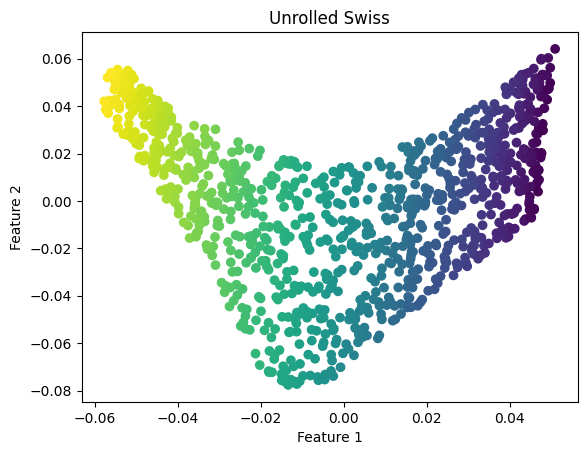

In [55]:
# Guess what here we needed t so taking the 1D array of t was useful
plt.scatter(X_unrolled[:, 0], X_unrolled[:, 1], c=t,  cmap='viridis')

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Unrolled Swiss')

### Conclusions
- We can see that LLE has unrolled the data well
- However a one drawback the distances are not perserved on large scale since we see here that the unrolled data should look like a rectangle not that twisted shape

---

## Conclusion

Dimensionality reduction transforms data into a more compact form, helping with training efficiency and interpretability. PCA is the go-to method for linear cases, while Kernel PCA and LLE are powerful for capturing nonlinear structures. Choosing the right method and number of components is crucial for preserving useful information without overcomplicating your model.

---

## Practical Excercises

### Question 9

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [20]:
mnist = fetch_openml('mnist_784', as_frame=False)

X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)

In [21]:
RF1 = RandomForestClassifier(random_state=42)

%time RF1.fit(X_train, y_train)

CPU times: user 1min 4s, sys: 221 ms, total: 1min 4s
Wall time: 1min 26s


RandomForestClassifier(random_state=42)

In [22]:
RF1.score(X_test, y_test)

0.9674

In [26]:
# Trying again with the use of pca
pca = PCA(n_components=0.95)      # 95% Variance Ratio

In [27]:
mnist_reduced = pca.fit_transform(mnist.data)

X_train, X_test, y_train, y_test = train_test_split(mnist_reduced, mnist.target, test_size=10000, random_state=42)

In [28]:
RF2 = RandomForestClassifier(random_state=42)

%time RF2.fit(X_train, y_train)

CPU times: user 2min 54s, sys: 340 ms, total: 2min 55s
Wall time: 3min 4s


RandomForestClassifier(random_state=42)

In [29]:
RF2.score(X_test, y_test)

0.9447

**The second classifier shows much slower training time (almost twice) compared to the first with a drop in accuracy that leads us to the fact that it is PCA do not always lead to a faster training since it depends on the dataset, model and algorithm used**

Now we will try with SGD

In [30]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=10000, random_state=42)

In [33]:
sgd_clf1 = SGDClassifier(random_state=42)

%time sgd_clf1.fit(X_train, y_train)

CPU times: user 3min 27s, sys: 361 ms, total: 3min 27s
Wall time: 3min 30s


SGDClassifier(random_state=42)

In [34]:
sgd_clf1.score(X_test, y_test)

0.8691

In [35]:
X_train, X_test, y_train, y_test = train_test_split(mnist_reduced, mnist.target, test_size=10000, random_state=42)

In [36]:
sgd_clf2 = SGDClassifier(random_state=42)

%time sgd_clf2.fit(X_train, y_train)

CPU times: user 52 s, sys: 67.7 ms, total: 52.1 s
Wall time: 52.3 s


SGDClassifier(random_state=42)

In [37]:
sgd_clf2.score(X_test, y_test)

0.8868

**WoW the PCA did its magic here both on time and performace, Time is reduced very much which indicates the effectivence of PCA and performance improved but this again depend on the algorithm itself, So there you have it: PCA can give you a formidable speedup, and if you're lucky a performance boost... but it's really not guaranteed: it depends on the model and the dataset!**

*****

### Question 10

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', learning_rate='auto', random_state=42)

In [52]:
X = mnist.data[:5000]
y = mnist.target[:5000].astype(int)

In [44]:
X_reduced = tsne.fit_transform(X)

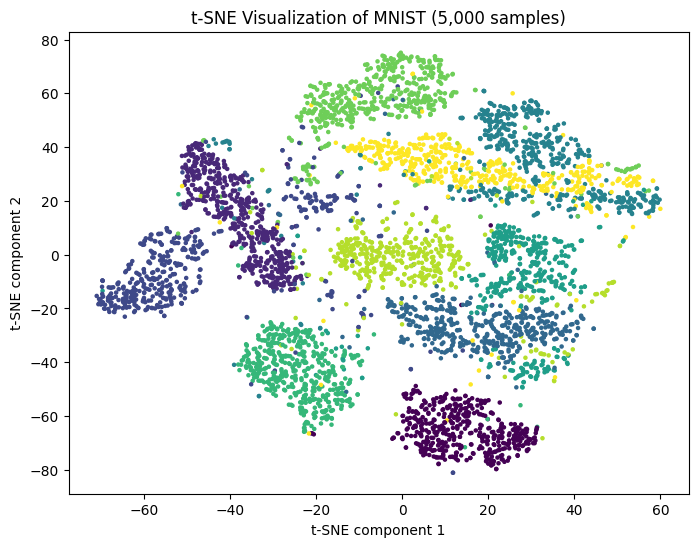

In [54]:
plt.figure(figsize=(8, 6))
plt.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    c=y,      # color by digit label
    s=5       # point size
)
plt.title("t-SNE Visualization of MNIST (5,000 samples)")
plt.xlabel("t-SNE component 1")
plt.ylabel("t-SNE component 2")
plt.show()